In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image


In [2]:
# Load image using PIL
image = Image.open('C:/Users/admin/Intern/Test.jpg')
image = image.resize((128, 128))  # resize for faster computation
img_np = np.array(image, dtype=np.float64) / 255  # Normalize RGB to [0,1]
h, w, d = img_np.shape
print(f"Image shape: {img_np.shape}")


Image shape: (128, 128, 3)


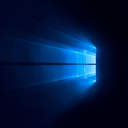

In [12]:
image

In [3]:
image_array = np.reshape(img_np, (h * w, d))  # shape: (num_pixels, 3)

In [7]:
k = 8  # Number of colors
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(image_array)
labels = kmeans.predict(image_array)

In [8]:
compressed_img = kmeans.cluster_centers_[labels]
compressed_img = np.reshape(compressed_img, (h, w, d))

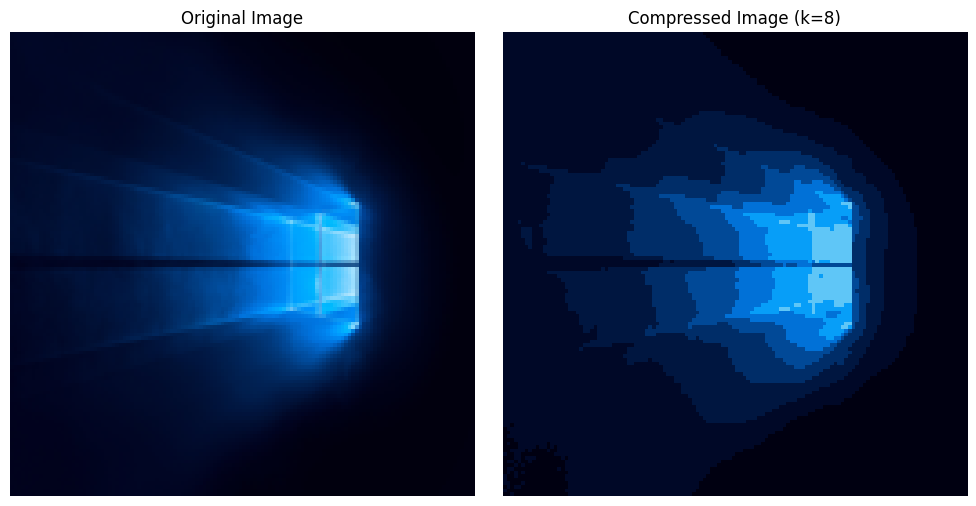

In [9]:
plt.figure(figsize=(10, 5))

# Original
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_np)
plt.axis('off')

# Compressed
plt.subplot(1, 2, 2)
plt.title(f"Compressed Image (k={k})")
plt.imshow(compressed_img)
plt.axis('off')

plt.tight_layout()
plt.show()